

# Project: Investigate a Dataset (Fifa EU Soccer data )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#garthering">Garthering</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

# The ultimate Soccer database for data analysis and machine learning


What you get:
+25,000 matches
+10,000 players
11 European Countries with their lead championship
Seasons 2008 to 2016
Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
Team line up with squad formation (X, Y coordinates)
Betting odds from up to 10 providers
Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches

In [1]:
#https://www.kaggle.com/hugomathien/soccer?

## Exploring the data:
 predict the outcome of the game. 
 
 The bookies use 3 classes (Home Win, Draw, Away Win). They get it right about 53% of the time.  you've got to know that the home team wins about 46% of the time. So the base case (constantly predicting Home Win) has indeed 46% precision. 


### Explore and visualize features
With access to players and teams attributes, team formations and in-game events you should be able to produce some interesting insights into The Beautiful Game . Who knows, Guardiola himself may hire one of you some day!

# Criteria 


1)to analyze at least one dependent variable and three independent variables 
code work 
2)project use numpy and pandas
  code practice : contain good comamnd , variable nam e, easy to read

3)quality :
question clearly states

4)wralling:
lean data, mearge multitple file , handle missing value

5)explore:
data explore in many ways: at leats 3 variables investigate, using (1) sing varible
and multiple variable(2)
releveant visualizations and statistical summaries: At least two kinds of plots

6)conclusion:The analysis does not state or imply that one change causes another based solely on a correlation, present limitaiton clear

7)Comunicaiton : easy to follow, co reasoning , and statical number khi make decision, hoac analyis
visualized using appropriate plots and parameter choices

8)Use statistical tests to draw rigorous conclusions where appropriate

<a id='garthering'></a>
## Gathering 

In [2]:
import pandas as pd 
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
import sqlite3

The data are store in sql_lite library ,we need to import it to python. We can study more about pd.read_sql in the link below
https://www.programcreek.com/python/example/101381/pandas.read_sql

In [3]:
# connect library to sqllite
con=sqlite3.connect("database.sqlite")
df_country=pd.read_sql('SELECT * FROM Country',con)
df_league=pd.read_sql('SELECT * FROM League',con)
df_match=pd.read_sql('SELECT * FROM Match',con)
df_player=pd.read_sql('SELECT * FROM Player',con)
df_playerattribute=pd.read_sql('SELECT * FROM Player_Attributes',con)
df_team=pd.read_sql('SELECT * FROM Team',con)
df_teamattribute=pd.read_sql('SELECT * FROM Team_Attributes',con)

In [4]:
# import country data 
df_country.to_csv("Country.csv",index=False)
df_country=pd.read_csv("Country.csv")
df_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [5]:
# import league data
df_league.to_csv("League.csv",index=False)
df_league=pd.read_csv("League.csv")
df_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [6]:
#import match data
df_match.to_csv("Match.csv",index=False)
df_match=pd.read_csv("Match.csv")
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [7]:
for i,v in enumerate(df_match):
    print(i,v)

0 id
1 country_id
2 league_id
3 season
4 stage
5 date
6 match_api_id
7 home_team_api_id
8 away_team_api_id
9 home_team_goal
10 away_team_goal
11 home_player_X1
12 home_player_X2
13 home_player_X3
14 home_player_X4
15 home_player_X5
16 home_player_X6
17 home_player_X7
18 home_player_X8
19 home_player_X9
20 home_player_X10
21 home_player_X11
22 away_player_X1
23 away_player_X2
24 away_player_X3
25 away_player_X4
26 away_player_X5
27 away_player_X6
28 away_player_X7
29 away_player_X8
30 away_player_X9
31 away_player_X10
32 away_player_X11
33 home_player_Y1
34 home_player_Y2
35 home_player_Y3
36 home_player_Y4
37 home_player_Y5
38 home_player_Y6
39 home_player_Y7
40 home_player_Y8
41 home_player_Y9
42 home_player_Y10
43 home_player_Y11
44 away_player_Y1
45 away_player_Y2
46 away_player_Y3
47 away_player_Y4
48 away_player_Y5
49 away_player_Y6
50 away_player_Y7
51 away_player_Y8
52 away_player_Y9
53 away_player_Y10
54 away_player_Y11
55 home_player_1
56 home_player_2
57 home_player_3
58 home

After inspect data, there are several columns , so I will drop column from 11 to 115 

In [8]:
df_match.drop(df_match.iloc[:,11:115],axis=1,inplace=True)
df_match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,1
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,2
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,2
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,0
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,1


There are alot of ids columns in these tables. To make sure that only 1 id is unique for 1 observation ,I will use groupby function and check if id value is equal to 1. If it is equal to 1, it is unique valu 

In [9]:
#check id is unique
df_match.groupby(["id"]).size()


id
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
30       1
        ..
25950    1
25951    1
25952    1
25953    1
25954    1
25955    1
25956    1
25957    1
25958    1
25959    1
25960    1
25961    1
25962    1
25963    1
25964    1
25965    1
25966    1
25967    1
25968    1
25969    1
25970    1
25971    1
25972    1
25973    1
25974    1
25975    1
25976    1
25977    1
25978    1
25979    1
Length: 25979, dtype: int64

Because value of df_match["id'] is equal to 1, use this id as a id for merging all table 

Same go with match id, groupby to find if the value of `match api id` is equal to 1  , this `match_api_id` is to combine match attribute and match

In [10]:
#check id is unique
df_match.groupby(["match_api_id"]).size()

match_api_id
483129     1
483130     1
483131     1
483132     1
483133     1
483134     1
483135     1
483136     1
483137     1
483138     1
483139     1
483140     1
483141     1
483142     1
483143     1
483144     1
483145     1
483146     1
483147     1
483148     1
483149     1
483150     1
483151     1
483152     1
483153     1
483154     1
483155     1
483156     1
483157     1
483158     1
          ..
2216643    1
2216644    1
2216645    1
2216646    1
2216647    1
2216648    1
2216649    1
2216650    1
2216651    1
2216652    1
2216653    1
2216654    1
2216655    1
2216656    1
2216657    1
2216658    1
2216659    1
2216660    1
2216661    1
2216662    1
2216663    1
2216664    1
2216665    1
2216666    1
2216667    1
2216668    1
2216669    1
2216670    1
2216671    1
2216672    1
Length: 25979, dtype: int64

We can see that this `home_team_api_id` and `home_away_api_id` are not unique so we can not use this `id` to combine data

In [11]:
# check id is unque
df_match.groupby(["home_team_api_id"]).size()


home_team_api_id
1601      120
1773       45
1957      120
2033       75
2182      120
2183       75
2186      105
4049       17
4064       15
4087       76
4170       19
6269       18
6351       15
6367       17
6391       19
6403      124
6413       68
6421       30
6433       34
6493       54
6547       17
6601       17
6631       17
7730       53
7788       51
7794       76
7819       95
7841      124
7842       64
7844      124
         ... 
10214     124
10215     124
10217     136
10218      68
10219      68
10228     136
10229     136
10233     151
10235     136
10238     124
10242      38
10243     143
10249     133
10251     115
10252     152
10260     152
10261     133
10264     124
10265     120
10267     152
10268      38
10269     136
10278      19
10281      76
108893     19
158085     49
177361     15
188163     17
208931     19
274581     30
Length: 299, dtype: int64

In [12]:
df_match.groupby(["away_team_api_id"]).size()

away_team_api_id
1601      120
1773       45
1957      120
2033       75
2182      120
2183       75
2186      105
4049       17
4064       15
4087       76
4170       19
6269       18
6351       15
6367       17
6391       19
6403      124
6413       68
6421       30
6433       34
6493       54
6547       17
6601       17
6631       17
7730       53
7788       51
7794       76
7819       95
7841      124
7842       64
7844      124
         ... 
10214     124
10215     124
10217     136
10218      68
10219      68
10228     136
10229     136
10233     151
10235     136
10238     124
10242      38
10243     143
10249     133
10251     113
10252     152
10260     152
10261     133
10264     124
10265     120
10267     152
10268      38
10269     136
10278      19
10281      76
108893     19
158085     49
177361     15
188163     17
208931     19
274581     30
Length: 299, dtype: int64

In [13]:
# import player data
df_player.to_csv("Player.csv",index=False)
df_player=pd.read_csv("Player.csv")
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [14]:
# check if player api id is unique 
df_player.groupby(["player_api_id"]).size()

player_api_id
2625      1
2752      1
2768      1
2770      1
2790      1
2796      1
2802      1
2805      1
2857      1
2862      1
2907      1
2973      1
2977      1
2983      1
2984      1
3140      1
3204      1
3263      1
3264      1
3316      1
3329      1
3377      1
3441      1
3512      1
3517      1
3520      1
4747      1
4863      1
4902      1
4939      1
         ..
701154    1
703659    1
704523    1
705484    1
706985    1
710807    1
715642    1
716998    1
717248    1
717270    1
717557    1
719413    1
720738    1
721133    1
722766    1
723037    1
725718    1
726956    1
728125    1
728414    1
728478    1
730065    1
733787    1
742405    1
743720    1
744907    1
746419    1
748432    1
750435    1
750584    1
Length: 11060, dtype: int64

In [15]:
# check if player_fifa_api_id is unique
df_player.groupby(["player_fifa_api_id"]).size()

player_fifa_api_id
2         1
6         1
11        1
16        1
27        1
28        1
41        1
58        1
61        1
80        1
158       1
164       1
185       1
195       1
201       1
241       1
244       1
245       1
246       1
249       1
250       1
268       1
269       1
330       1
388       1
450       1
492       1
496       1
552       1
560       1
         ..
232529    1
232550    1
232555    1
232556    1
232643    1
232659    1
232665    1
232668    1
232693    1
233006    1
233007    1
233027    1
233139    1
233188    1
233222    1
233223    1
233229    1
233231    1
233434    1
233460    1
233472    1
233502    1
233642    1
233711    1
233884    1
233885    1
233911    1
233930    1
233969    1
234141    1
Length: 11060, dtype: int64

In [16]:
# import player attribute data
df_playerattribute.to_csv("Player_Attributes.csv",index=False)
df_playerattribute=pd.read_csv("Player_Attributes.csv")
df_playerattribute.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [17]:
df_playerattribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [18]:
# import team data
df_team.to_csv("Team.csv",index=False)
df_team=pd.read_csv("Team.csv")
df_team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
5,6,8635,229.0,RSC Anderlecht,AND
6,7,9991,674.0,KAA Gent,GEN
7,8,9998,1747.0,RAEC Mons,MON
8,9,7947,NaN,FCV Dender EH,DEN
9,10,9985,232.0,Standard de Liège,STL


In [19]:
# check team_api_id is unique
df_team.groupby(["team_api_id"]).size()

team_api_id
1601      1
1773      1
1957      1
2033      1
2182      1
2183      1
2186      1
4049      1
4064      1
4087      1
4170      1
6269      1
6351      1
6367      1
6391      1
6403      1
6413      1
6421      1
6433      1
6493      1
6547      1
6601      1
6631      1
7730      1
7788      1
7794      1
7819      1
7841      1
7842      1
7844      1
         ..
10214     1
10215     1
10217     1
10218     1
10219     1
10228     1
10229     1
10233     1
10235     1
10238     1
10242     1
10243     1
10249     1
10251     1
10252     1
10260     1
10261     1
10264     1
10265     1
10267     1
10268     1
10269     1
10278     1
10281     1
108893    1
158085    1
177361    1
188163    1
208931    1
274581    1
Length: 299, dtype: int64

In [20]:
# import teammate attribute data
df_teamattribute.to_csv("Team_Attributes.csv",index=False)
df_teamattribute=pd.read_csv("Team_Attributes.csv")
df_teamattribute.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


After import all data next step is to access data issue and clean dirty data , and merge data 

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

First, We merged league data and country data , named it as df_league1. Because the id in df_league and df_country is unique so we use this id on merge 

In [21]:
df_league1=pd.merge(df_league,df_country,on="id")
df_league1

,id,country_id,name_x,name_y
0,1,1,Belgium Jupiler League,Belgium
1,1729,1729,England Premier League,England
2,4769,4769,France Ligue 1,France
3,7809,7809,Germany 1. Bundesliga,Germany
4,10257,10257,Italy Serie A,Italy
5,13274,13274,Netherlands Eredivisie,Netherlands
6,15722,15722,Poland Ekstraklasa,Poland
7,17642,17642,Portugal Liga ZON Sagres,Portugal
8,19694,19694,Scotland Premier League,Scotland
9,21518,21518,Spain LIGA BBVA,Spain


This data is dirty with similar id content and inproriate 

Merge data between df_player and df_player attribute because they are the same player catergory, because we found that `player_api_id`, `play_fifa_api_id ` is unquique , we use one of them to merge

In [22]:
df_player1=pd.merge(df_player,df_playerattribute,on="player_api_id")
df_player1.head()

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,2016-02-18 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,2015-11-19 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,2015-09-21 00:00:00,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,2015-03-20 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,2007-02-22 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


Get infor from the data to check if data are having the proper type or having null value 

In [23]:
df_player1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 48 columns):
id_x                    183978 non-null int64
player_api_id           183978 non-null int64
player_name             183978 non-null object
player_fifa_api_id_x    183978 non-null int64
birthday                183978 non-null object
height                  183978 non-null float64
weight                  183978 non-null int64
id_y                    183978 non-null int64
player_fifa_api_id_y    183978 non-null int64
date                    183978 non-null object
overall_rating          183142 non-null float64
potential               183142 non-null float64
preferred_foot          183142 non-null object
attacking_work_rate     180748 non-null object
defensive_work_rate     183142 non-null object
crossing                183142 non-null float64
finishing               183142 non-null float64
heading_accuracy        183142 non-null float64
short_passing           183142 non-null flo

in the `penalties` we can see that only 183142 value compared to 183978, there are missing value in df player

## Quality issue 
### df league
- df_league has 1 extra id column 
- colums names are not appropriate 

### df player
- missing value in penaties
- `id_x`,`player_fifa_api_id_x`,`id_y`,`player_fifa_api_id_y`  are unimportant
- dupplicated values

### df_match
- `id`, `league_id`, `stage`,`date`,`match_api_id`, `away_team_api_id`, are unescessary

### df_team
- redundant `id`,`team_fifa_api_id`,`team_short_name`

### df_teamattribute
- no need `id`,`team_fifa_api_id`,`date`, in df_attribute

## Clean data

### df league
#### Define
1 more extra id column need to be dropped and `name_x` need to be change to `league`, `name_y` need to be changed to `country` 
#### Code

Make a copy before we clean data to make sure that we can comeback and fix data

In [24]:
df_clean=df_league1.copy()
df_clean

,id,country_id,name_x,name_y
0,1,1,Belgium Jupiler League,Belgium
1,1729,1729,England Premier League,England
2,4769,4769,France Ligue 1,France
3,7809,7809,Germany 1. Bundesliga,Germany
4,10257,10257,Italy Serie A,Italy
5,13274,13274,Netherlands Eredivisie,Netherlands
6,15722,15722,Poland Ekstraklasa,Poland
7,17642,17642,Portugal Liga ZON Sagres,Portugal
8,19694,19694,Scotland Premier League,Scotland
9,21518,21518,Spain LIGA BBVA,Spain


In [25]:
# drop country_id column
df_clean.drop("id",axis=1,inplace=True)

In [26]:
# change columns names to `leage` and `country`
df_clean.rename(columns={'name_x':'league'}, inplace=True)
df_clean.rename(columns={'name_y':'country'}, inplace=True)

#### Test

In [27]:
# recheck 
df_clean

,country_id,league,country
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy
5,13274,Netherlands Eredivisie,Netherlands
6,15722,Poland Ekstraklasa,Poland
7,17642,Portugal Liga ZON Sagres,Portugal
8,19694,Scotland Premier League,Scotland
9,21518,Spain LIGA BBVA,Spain


### df player
#### Define
- drop `id_x`,`player_fifa_api_id_x`,`id_y`,`player_fifa_api_id_y`
- Missing records in `penaties` need to be dropped 
- drop dupplicates
 
#### Code
Make a copy before we clean data to make sure that we can comeback and fix data

In [28]:
df_clean1=df_player1.copy()

In [29]:
# drop id_x,player_fifa_api_id_x,date 
df_clean1.drop(['id_x','player_fifa_api_id_x','id_y','player_fifa_api_id_y'],axis=1,inplace=True)

In [30]:
# drop na value 
df_clean1.dropna(how='any',inplace=True)

In [31]:
# drop duplicates value 
df_clean1.drop_duplicates(keep=False,inplace=True)

#### Test

In [32]:
df_clean1

,player_api_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,71.0,right,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-11-19 00:00:00,67.0,71.0,right,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-09-21 00:00:00,62.0,66.0,right,medium,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-03-20 00:00:00,61.0,65.0,right,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2007-02-22 00:00:00,61.0,65.0,right,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,2016-04-21 00:00:00,74.0,76.0,left,high,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,2016-04-07 00:00:00,74.0,76.0,left,high,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,2016-01-07 00:00:00,73.0,75.0,left,high,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,2015-12-24 00:00:00,73.0,75.0,left,high,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,2015-12-17 00:00:00,73.0,75.0,left,high,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


To recheck check if data is null we use isnull and sum, we can see the value in the right hand are 0, it means that data have no null value 

In [33]:
df_clean1.isnull().sum()

player_api_id          0
player_name            0
birthday               0
height                 0
weight                 0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0


### df_match
#### Define
- Remove `id`, `league_id`, `stage`,`date`,`match_api_id`, `away_team_api_id`

#### Code
Make a copy first

In [34]:
df_clean2=df_match.copy()
df_clean2.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [35]:
# drop `id`, `league_id`, `stage`,`date`,`match_api_id`, `away_team_api_id`
df_clean2.drop(['id', 'league_id', 'stage','date','match_api_id', 'away_team_api_id'],axis=1,inplace=True)

In [36]:
df_clean2.head()

,country_id,season,home_team_api_id,home_team_goal,away_team_goal
0,1,2008/2009,9987,1,1
1,1,2008/2009,10000,0,0
2,1,2008/2009,9984,0,3
3,1,2008/2009,9991,5,0
4,1,2008/2009,7947,1,3


We can see df_clean and df_clean2 have the same `country_id` so we should merge 2 data type become df_clean after clearing unecessary columms.

In [37]:
df_clean=pd.merge(df_clean,df_clean2,on="country_id")
df_clean.head()

,country_id,league,country,season,home_team_api_id,home_team_goal,away_team_goal
0,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,1
1,1,Belgium Jupiler League,Belgium,2008/2009,10000,0,0
2,1,Belgium Jupiler League,Belgium,2008/2009,9984,0,3
3,1,Belgium Jupiler League,Belgium,2008/2009,9991,5,0
4,1,Belgium Jupiler League,Belgium,2008/2009,7947,1,3


After checking data, I found out that df_clean `home_team_api_id` is `team_api_id` of other tables.
So change name `home_team_api_id` to `team_api_id` that we can merge to df_team and df_teamattribute later 

In [38]:
df_clean.rename(columns={"home_team_api_id":"team_api_id"},inplace=True)
df_clean.head()

,country_id,league,country,season,team_api_id,home_team_goal,away_team_goal
0,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,1
1,1,Belgium Jupiler League,Belgium,2008/2009,10000,0,0
2,1,Belgium Jupiler League,Belgium,2008/2009,9984,0,3
3,1,Belgium Jupiler League,Belgium,2008/2009,9991,5,0
4,1,Belgium Jupiler League,Belgium,2008/2009,7947,1,3


### Test

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Data columns (total 7 columns):
country_id        25979 non-null int64
league            25979 non-null object
country           25979 non-null object
season            25979 non-null object
team_api_id       25979 non-null int64
home_team_goal    25979 non-null int64
away_team_goal    25979 non-null int64
dtypes: int64(4), object(3)
memory usage: 1.6+ MB


After cleaning there NA value

### df_team
#### Define
redundant `id`,`team_fifa_api_id`,`team_short_name` needed to be removed
#### Code
Make a copy 

In [40]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [41]:
# make a copy 
df_team1=df_team.copy()

In [42]:
# drop unescessary columns
df_team1.drop(['id','team_fifa_api_id','team_short_name'],axis=1,inplace=True)

In [43]:
df_team1.head()

,team_api_id,team_long_name
0,9987,KRC Genk
1,9993,Beerschot AC
2,10000,SV Zulte-Waregem
3,9994,Sporting Lokeren
4,9984,KSV Cercle Brugge


### df_teamattribute
##### Define 
- remove
`id`,`team_fifa_api_id`,`date`,` in df_attribute

#### Code

In [44]:
df_at=df_teamattribute.copy()

In [45]:
# drop unecessary in the data
df_at.drop(['id','team_fifa_api_id','date',],axis=1,inplace=True)

In [46]:
df_at.head()

,team_api_id,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9930,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,9930,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,9930,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,8485,70,Fast,NaN,Little,70,Long,Organised,70,Risky,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,8485,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [47]:
# merge team and team attribute
df_clean3=pd.merge(df_team1,df_at,on="team_api_id")
df_clean3.head()

,team_api_id,team_long_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9987,KRC Genk,45,Balanced,NaN,Little,45,Mixed,Organised,50,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,9987,KRC Genk,66,Balanced,NaN,Little,52,Mixed,Organised,65,...,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,9987,KRC Genk,53,Balanced,NaN,Little,55,Mixed,Organised,55,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,9987,KRC Genk,58,Balanced,NaN,Little,38,Mixed,Organised,67,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,9987,KRC Genk,58,Balanced,52.0,Normal,38,Mixed,Organised,67,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


we can see the relationship of df_clean and df_clean3 with `team_api_id` , we should merge them for futher analysis

In [48]:
# merge clean data and clean3 data to clean data
df_clean=pd.merge(df_clean,df_clean3,on="team_api_id")
df_clean.head()

,country_id,league,country,season,team_api_id,home_team_goal,away_team_goal,team_long_name,buildUpPlaySpeed,buildUpPlaySpeedClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,1,KRC Genk,45,Balanced,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,1,KRC Genk,66,Balanced,...,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,1,KRC Genk,53,Balanced,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,1,KRC Genk,58,Balanced,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,1,KRC Genk,58,Balanced,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


# Store data

There are 2 data set represent for `players`: `df_clean1` and `team`:`df_clean` , we need to store 2 of these data into csv files after cleaning and merging 

In [49]:
# store players- df_clean1 into master file
df_clean1.to_csv("player_master.csv",index=False)
# store team- df_clean into master file
df_clean.to_csv("team_master.csv",index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

In [50]:
player_master=pd.read_csv("player_master.csv")
player_master.head()

,player_api_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,71.0,right,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-11-19 00:00:00,67.0,71.0,right,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-09-21 00:00:00,62.0,66.0,right,medium,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-03-20 00:00:00,61.0,65.0,right,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2007-02-22 00:00:00,61.0,65.0,right,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [51]:
team_master=pd.read_csv("team_master.csv")
team_master.head()

,country_id,league,country,season,team_api_id,home_team_goal,away_team_goal,team_long_name,buildUpPlaySpeed,buildUpPlaySpeedClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,1,KRC Genk,45,Balanced,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,1,KRC Genk,66,Balanced,...,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,1,KRC Genk,53,Balanced,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,1,KRC Genk,58,Balanced,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,1,KRC Genk,58,Balanced,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


### Research Question 1 : Which players had the most penalties? 

In [52]:
# max pentaty is 94
penalty=player_master[player_master["penalties"]==player_master["penalties"].max()]
penalty


,player_api_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
146680,39225,Rickie Lambert,1982-02-16 00:00:00,187.96,170,2016-03-10 00:00:00,75.0,75.0,right,high,...,77.0,96.0,30.0,26.0,19.0,13.0,15.0,7.0,16.0,11.0
146681,39225,Rickie Lambert,1982-02-16 00:00:00,187.96,170,2015-12-24 00:00:00,75.0,75.0,right,high,...,77.0,96.0,30.0,26.0,19.0,13.0,15.0,7.0,16.0,11.0
146682,39225,Rickie Lambert,1982-02-16 00:00:00,187.96,170,2015-10-23 00:00:00,75.0,75.0,right,high,...,77.0,96.0,30.0,26.0,19.0,13.0,15.0,7.0,16.0,11.0
146683,39225,Rickie Lambert,1982-02-16 00:00:00,187.96,170,2015-09-21 00:00:00,75.0,75.0,right,high,...,77.0,96.0,30.0,26.0,19.0,13.0,15.0,7.0,16.0,11.0


### => **Rickie is the person win the most penaties**

#### check penaties information

### Univariate Visualization

(array([4.0000e+00, 9.8000e+01, 1.6340e+03, 1.5020e+03, 4.5460e+03,
        5.9880e+03, 6.5650e+03, 8.2540e+03, 1.4498e+04, 1.7467e+04,
        2.0333e+04, 2.2644e+04, 2.2800e+04, 2.1680e+04, 1.7120e+04,
        8.9940e+03, 4.4890e+03, 1.4170e+03, 2.9800e+02, 2.3000e+01]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <a list of 20 Patch objects>)

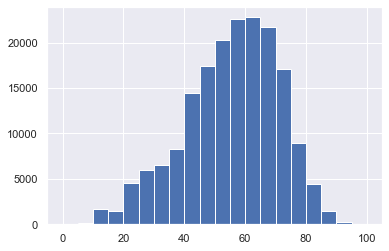

In [53]:
bins=np.arange(0, player_master["penalties"].max()+5,5)
plt.hist(data=player_master,x="penalties", bins=bins)


### Research Question 2 : What teams improved the most over the  2014 -2015 and 2015-2016 time period?

In [74]:
team_master["season"].unique()

array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2014/2015', '2015/2016', '2013/2014'], dtype=object)

To know which team improve the most , we have to know which team win the most over time period , there for we add a column to caculate total point each team gain for years, base on foot ball score, 3 point for win , 1 points for tie, 0 points for lose

In [55]:
# if home_team_goal is bigger than away_team_goal , that team win 
def f(row):
    if row["home_team_goal"]==row["away_team_goal"]:
        val="tie"
    elif row["home_team_goal"]>row["away_team_goal"]:
        val="win"
    elif row["home_team_goal"]<row["away_team_goal"]:
        val="lose"
    return val

In [56]:
#add ratio column to sort only the win team of every season
team_master["ratio"]=team_master.apply(f,axis=1)
team_master.head()

,country_id,league,country,season,team_api_id,home_team_goal,away_team_goal,team_long_name,buildUpPlaySpeed,buildUpPlaySpeedClass,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,ratio
0,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,1,KRC Genk,45,Balanced,...,Normal,Organised,70,High,65,Press,70,Wide,Cover,tie
1,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,1,KRC Genk,66,Balanced,...,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap,tie
2,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,1,KRC Genk,53,Balanced,...,Normal,Organised,47,Medium,45,Press,55,Normal,Cover,tie
3,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,1,KRC Genk,58,Balanced,...,Normal,Organised,47,Medium,45,Press,55,Normal,Cover,tie
4,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,1,KRC Genk,58,Balanced,...,Normal,Organised,47,Medium,45,Press,55,Normal,Cover,tie


after add new `ratio` column we should drop old columns, so data can be clean, drop `home_team_goal`,`away_team_goal`


In [57]:
# maka a copy first before cleaning data
team_master1=team_master.copy()

In [58]:
#drop columns
team_master1.drop(["home_team_goal","home_team_goal"],axis=1, inplace=True)

In [59]:
# add `point` columns
def f(row):
    if row["ratio"]=="win":
        val=3
    elif row["ratio"]=="lose":
        val=1
    elif row["ratio"]=="tie":
        val=0
    return val

In [60]:
team_master1["point"]=team_master1.apply(f,axis=1)
team_master1.head()

,country_id,league,country,season,team_api_id,away_team_goal,team_long_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,...,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,ratio,point
0,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,KRC Genk,45,Balanced,NaN,...,Organised,70,High,65,Press,70,Wide,Cover,tie,0
1,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,KRC Genk,66,Balanced,NaN,...,Organised,48,Medium,47,Press,54,Normal,Offside Trap,tie,0
2,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,KRC Genk,53,Balanced,NaN,...,Organised,47,Medium,45,Press,55,Normal,Cover,tie,0
3,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,KRC Genk,58,Balanced,NaN,...,Organised,47,Medium,45,Press,55,Normal,Cover,tie,0
4,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,KRC Genk,58,Balanced,52.0,...,Organised,47,Medium,45,Press,55,Normal,Cover,tie,0


In [61]:
team_master1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142093 entries, 0 to 142092
Data columns (total 30 columns):
country_id                        142093 non-null int64
league                            142093 non-null object
country                           142093 non-null object
season                            142093 non-null object
team_api_id                       142093 non-null int64
away_team_goal                    142093 non-null int64
team_long_name                    142093 non-null object
buildUpPlaySpeed                  142093 non-null int64
buildUpPlaySpeedClass             142093 non-null object
buildUpPlayDribbling              47229 non-null float64
buildUpPlayDribblingClass         142093 non-null object
buildUpPlayPassing                142093 non-null int64
buildUpPlayPassingClass           142093 non-null object
buildUpPlayPositioningClass       142093 non-null object
chanceCreationPassing             142093 non-null int64
chanceCreationPassingClass        142093

In [62]:
# recheck data
team_master1.head()

,country_id,league,country,season,team_api_id,away_team_goal,team_long_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,...,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,ratio,point
0,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,KRC Genk,45,Balanced,NaN,...,Organised,70,High,65,Press,70,Wide,Cover,tie,0
1,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,KRC Genk,66,Balanced,NaN,...,Organised,48,Medium,47,Press,54,Normal,Offside Trap,tie,0
2,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,KRC Genk,53,Balanced,NaN,...,Organised,47,Medium,45,Press,55,Normal,Cover,tie,0
3,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,KRC Genk,58,Balanced,NaN,...,Organised,47,Medium,45,Press,55,Normal,Cover,tie,0
4,1,Belgium Jupiler League,Belgium,2008/2009,9987,1,KRC Genk,58,Balanced,52.0,...,Organised,47,Medium,45,Press,55,Normal,Cover,tie,0


#### season 2014-2015

In [63]:
season_1415=team_master1[team_master1["season"]=="2014/2015"]
# rank value 
count_1415=season_1415.groupby('team_long_name')["point"].sum()
# make table
count_1415=count_1415.reset_index(name="point").sort_values(by='point', ascending=False)
count_1415

,team_long_name,point
44,FC Barcelona,300
118,PSV,294
134,Real Madrid CF,294
85,Juventus,288
24,Celtic,282
55,FC Porto,276
173,Valencia CF,276
148,SL Benfica,270
105,Manchester United,270
26,Chelsea,270


#### season 2015-2016

In [64]:
season_1516=team_master1[team_master1["season"]=="2015/2016"]
# rank value 
count_1516=season_1516.groupby('team_long_name')["point"].sum()
# make table
count_1516=count_1516.reset_index(name="point").sort_values(by='point', ascending=False)
count_1516

,team_long_name,point
44,FC Barcelona,300
129,Real Madrid CF,300
82,Juventus,294
107,Napoli,288
143,SL Benfica,282
46,FC Bayern Munich,276
117,Paris Saint-Germain,276
14,Atlético Madrid,276
150,Sevilla FC,276
45,FC Basel,264


To save time ,we only need to focus on 1 period to see the change, if we merge too many period of time , the data will be excluded . Every season there would be different teams. In order to decrease bias , we just chose the most recent data time which in 2014 to 2016, next step is to merge 2 table above

### Bivariate Visualization

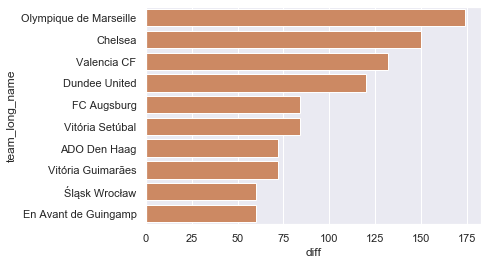

In [65]:
# merge table
df_improve=pd.merge(count_1516,count_1415,on="team_long_name")
#change columsn name from point to period 
df_improve.rename(columns={"point_x":'2014-2015',"point_y":"2015-2016"},inplace=True)
# add diffence as diff to see the gap between 2 season , which team improve the most 
df_improve["diff"]=df_improve["2015-2016"]-df_improve["2014-2015"]
# rank 
df_improve=df_improve.sort_values(by="diff",ascending=False)[:10]
df_improve
# get color 
base_color=sns.color_palette()[1]
# draw chart
sns.barplot(x="diff",y="team_long_name",data=df_improve,color=base_color)


**We can see after 2 seansons, team Olympique de Marseille is the team improve the most with most 175 points**

## Research Question 3 : What team attributes lead to the most victories?

### Team attributes affect the victories 

####  Teams have the most victories 

In [66]:
victory=team_master1.groupby('team_long_name')["point"].sum().reset_index(name="sum").sort_values(by="sum",ascending=False)
victory.head()

,team_long_name,sum
74,FC Barcelona,2412
205,Real Madrid CF,2394
48,Celtic,2214
157,Manchester United,2208
156,Manchester City,2160


### => FC Barcelona receive the max point 2412, perform the most victory 

In [67]:
import pandas as pd
# show all columns and rows by set_option
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 1000)
team_master1=team_master1[team_master1["team_long_name"]=="FC Barcelona"]
team_master1.head()

,country_id,league,country,season,team_api_id,away_team_goal,team_long_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,ratio,point
126436,21518,Spain LIGA BBVA,Spain,2008/2009,8634,0,FC Barcelona,42,Balanced,NaN,Little,30,Short,Free Form,65,Normal,40,Normal,70,Lots,Free Form,70,High,30,Contain,70,Wide,Offside Trap,win,3
126437,21518,Spain LIGA BBVA,Spain,2008/2009,8634,0,FC Barcelona,43,Balanced,NaN,Little,34,Mixed,Free Form,59,Normal,25,Little,68,Lots,Free Form,67,High,43,Press,68,Wide,Cover,win,3
126438,21518,Spain LIGA BBVA,Spain,2008/2009,8634,0,FC Barcelona,24,Slow,NaN,Little,25,Short,Free Form,37,Normal,24,Little,54,Normal,Free Form,66,Medium,63,Press,66,Normal,Cover,win,3
126439,21518,Spain LIGA BBVA,Spain,2008/2009,8634,0,FC Barcelona,35,Balanced,NaN,Little,32,Short,Free Form,37,Normal,31,Little,35,Normal,Free Form,61,Medium,63,Press,65,Normal,Cover,win,3
126440,21518,Spain LIGA BBVA,Spain,2008/2009,8634,0,FC Barcelona,35,Balanced,35.0,Normal,32,Short,Free Form,37,Normal,31,Little,35,Normal,Free Form,61,Medium,63,Press,65,Normal,Cover,win,3


Next step , we will see quick what kind of charater contribute to to sucesse of Barcelona, chosing season 2015 to 2016 

### Multivariate Visualization

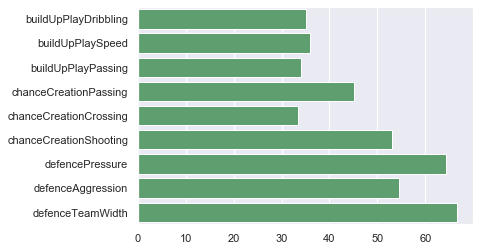

In [104]:
#choose data time in 2015 -2016 
attr_1516=team_master1[team_master1["season"]=="2015/2016"]
# to see statistic of Barcelo, we group int value 
mean_attr=attr_1516[['buildUpPlayDribbling','buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting','defencePressure','defenceAggression','defenceTeamWidth']]
# caculate mean
mean_attr=mean_attr.mean()
mean_attr
# draw a bar plot of multiple varibles
base_color=sns.color_palette()[2]
sns.barplot(y=mean_attr.index,x=mean_attr.values,color=base_color)

### =>**we can see that Barcelowin because they focus on defense , especially on creating pressure and defence width,defense Agression ,chance creationshooting,**

In [107]:
attr_1516["defencePressureClass"].unique()

array(['High', 'Medium'], dtype=object)

In [109]:
attr_1516["defenceTeamWidthClass"].unique()

array(['Wide', 'Normal'], dtype=object)

In [111]:
attr_1516["defenceAggressionClass"].unique()

array(['Contain', 'Press'], dtype=object)

In [113]:
attr_1516["chanceCreationShootingClass"].unique()

array(['Lots', 'Normal'], dtype=object)

### **In conclusion , tactic that brings cup for Barcelona are the way they protect the goals from competiors, put alot of pressure in defense lines with wide space, meanwhile at the same time, create chances to the team to score**

<a id='conclusions'></a>
## Conclusions
Rickie Lamber is the person win the most penaties.
FC Barcelona receive the max point 2412, perform the most victory.They focus on defense , especially on creating pressure and defence width,defense Agression ,chance creationshooting.Tactic that brings cup for Barcelona are the way they protect the goals from competiors, put alot of pressure in defense lines with wide space, meanwhile at the same time, create chances to the team to score
## COMMENTS/ RECOMMENDATION
Limitation in understanding def , which can reduce the repeation of unique(), data are too much ,cause confusing when merging data, data are lacking of explanation in kaggle website , lacking understading about sql and soccer knowledge